In [4]:
# import libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

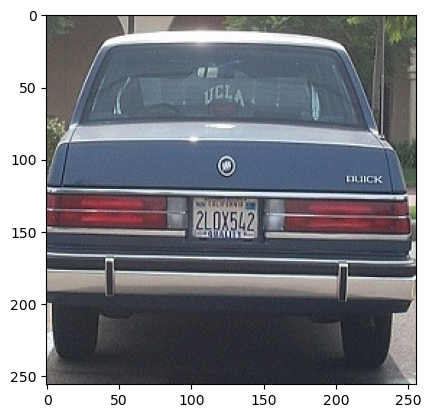

In [5]:
img = cv2.imread("car-1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# PART A: function to perform convolution
def ICV_CONV(img, kernel):
    # define image and kernel height and weight
    img_height = img.shape[0]
    img_width = img.shape[1]
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    # add padding to image
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2
    padded_img = np.zeros((img_height + padding_height*2, img_width + padding_width*2), dtype=np.uint8)
    padded_img[padding_height:-padding_height, padding_width:-padding_width] = img


    # define output image
    out_img = np.zeros((img_height, img_width), dtype=np.uint8)
    
    for i in range(img_height):
        for j in range(img_width):
            # apply kernel
            matrix = padded_img[i:i + kernel_height, j:j + kernel_width]
            out_img[i, j] = np.sum(matrix * kernel)

    return out_img

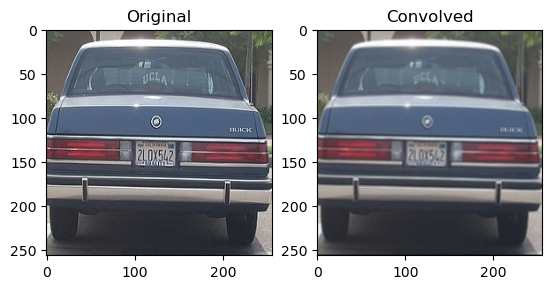

In [7]:
# PART B: define average kernel
average_kernel = np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])

# seperate to RGB channels
average_channels = [ICV_CONV(img[..., i], average_kernel) for i in range(3)]

# stack channels back into a color image
average_img = np.stack(average_channels, axis=-1)

# show images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(average_img)
plt.title("Convolved")

plt.show()

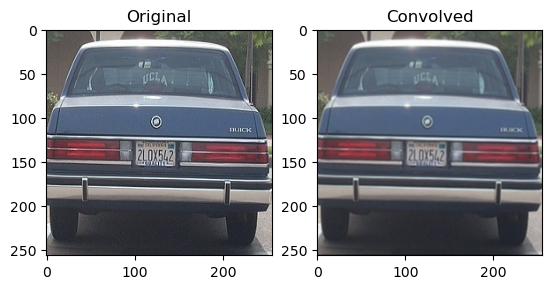

In [8]:
# PART C: define kernel A
kernel_a = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]]) / 16

# seperate to RGB channels
channels_a = [ICV_CONV(img[..., i], kernel_a) for i in range(3)]

# stack channels back into a color image
img_a = np.stack(channels_a, axis=-1)

# show images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(img_a)
plt.title("Convolved")

plt.show()

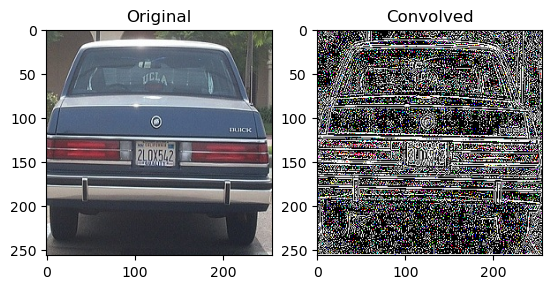

In [9]:
# PART C: define kernel B
kernel_b = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

kernel_b = kernel_b / np.sum(np.abs(kernel_b))

# seperate to RGB channels
channels_b = [ICV_CONV(img[..., i], kernel_b) for i in range(3)]

# stack channels back into a color image
img_b = np.stack(channels_b, axis=-1)

# show images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(img_b)
plt.title("Convolved")

plt.show()

Text(0.5, 1.0, 'A followed by A')

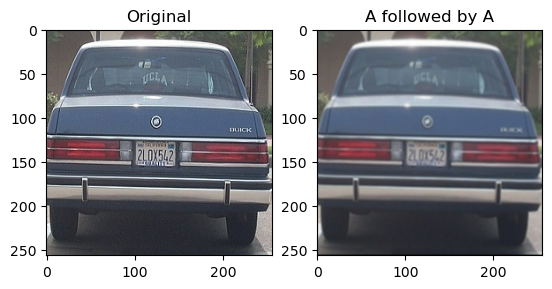

In [10]:
# PART D: a followed by a
channels_aa = [ICV_CONV(img_a[..., i], kernel_a) for i in range(3)]
img_aa = np.stack(channels_aa, axis=-1)
# show images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(img_aa)
plt.title("A followed by A")

Text(0.5, 1.0, 'A followed by B')

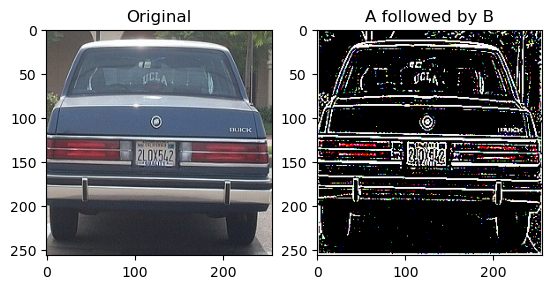

In [11]:
# PART D: a followed by b
channels_ab = [ICV_CONV(img_a[..., i], kernel_b) for i in range(3)]
img_ab = np.stack(channels_ab, axis=-1)
# show images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(img_ab)
plt.title("A followed by B")

Text(0.5, 1.0, 'B followed by A')

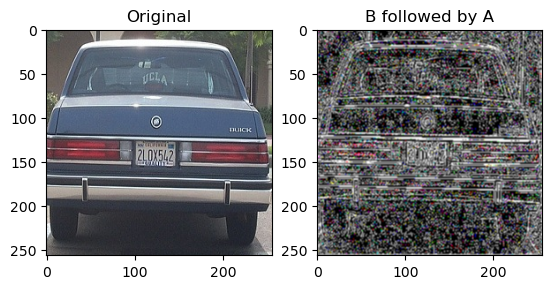

In [12]:
# PART D: b followed by a
channels_ba = [ICV_CONV(img_b[..., i], kernel_a) for i in range(3)]
img_ba = np.stack(channels_ba, axis=-1)
# show images
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(img_ba)
plt.title("B followed by A")